In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras import utils
from keras.datasets import fashion_mnist

In [2]:
(trainX,trainY),(testX,testY) = fashion_mnist.load_data()

In [3]:
train_images = trainX
test_images = testX
train_label = trainY
test_label = testY

In [4]:
print('shape of trainX: ', trainX.shape, 'shape of testX: ',testX.shape)
print('shape of trainY: ', trainY.shape, 'shape of testY: ',testY.shape)

shape of trainX:  (60000, 28, 28) shape of testX:  (10000, 28, 28)
shape of trainY:  (60000,) shape of testY:  (10000,)


In [5]:
trainX = trainX.reshape(60000,28,28,1)
testX = testX.reshape(10000,28,28,1)

In [6]:
class_label = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

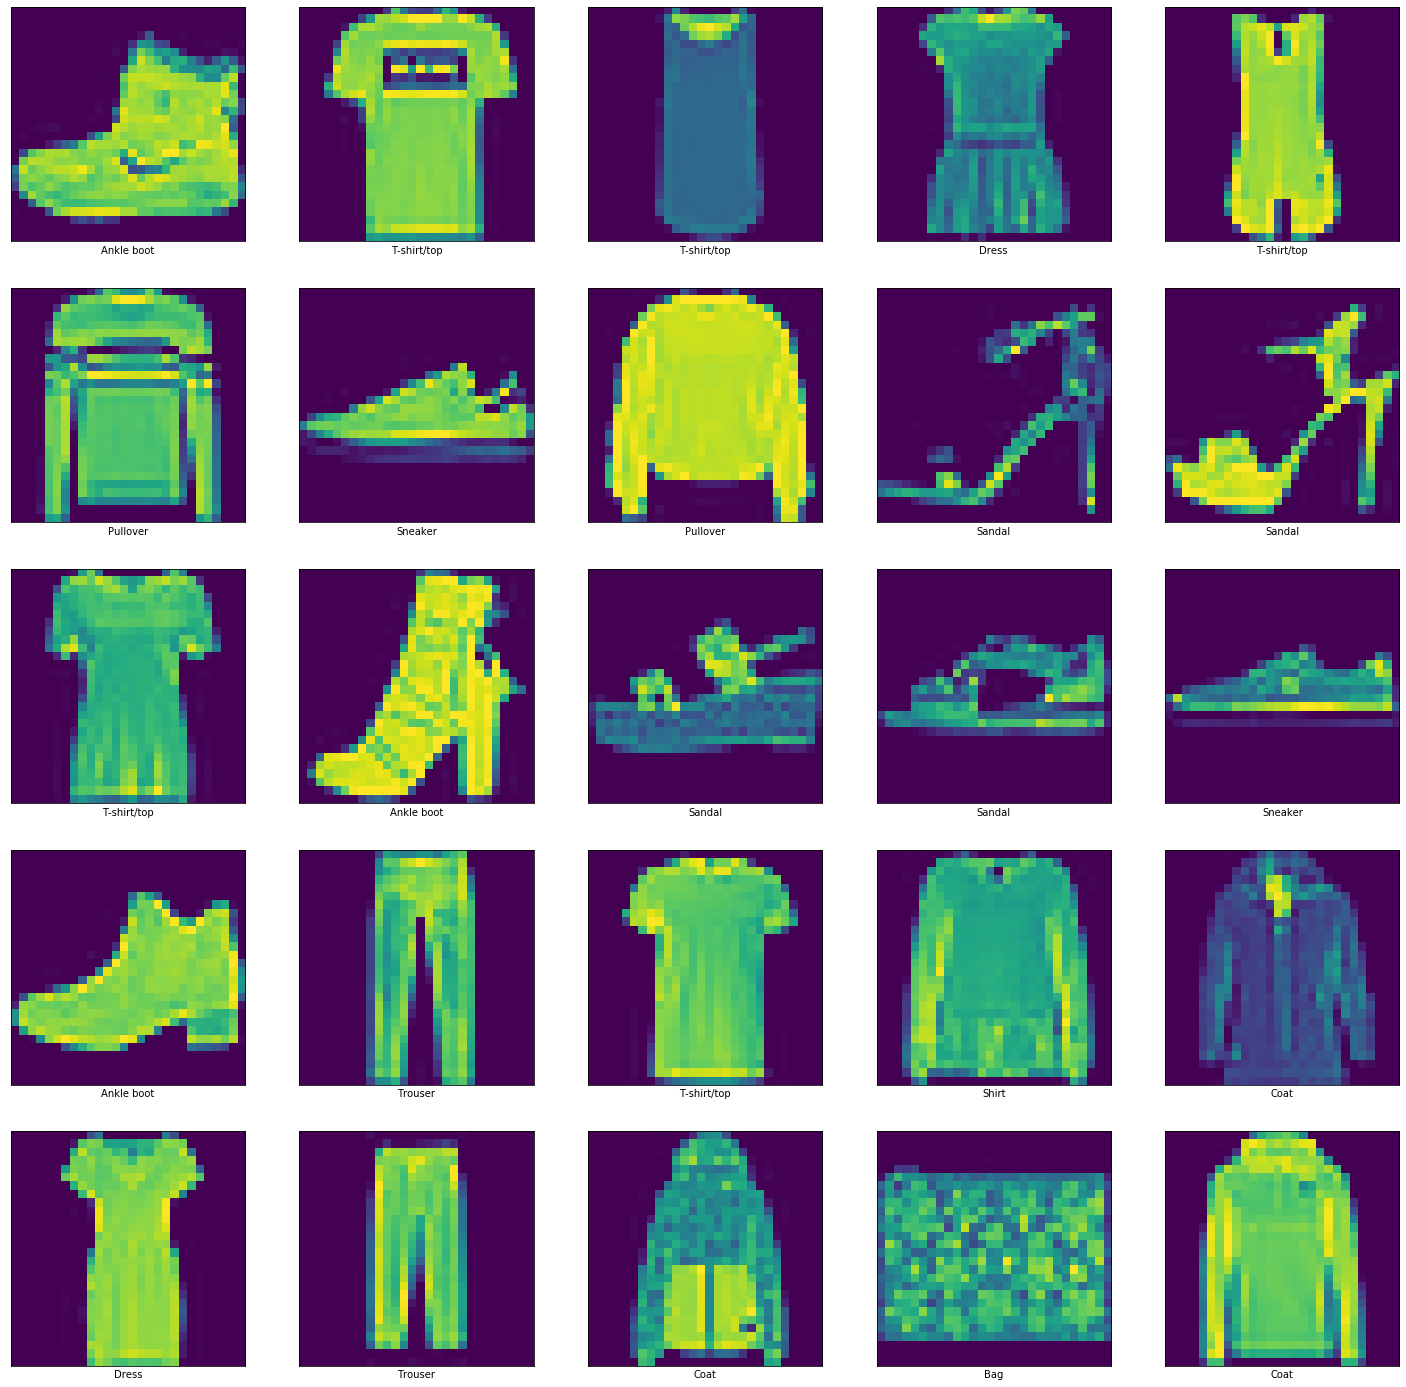

In [7]:
plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i])
    plt.xlabel(class_label[train_label[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [8]:
trainX = trainX / 255.0
testX = testX / 255.0
trainY = utils.to_categorical(trainY)
testY = utils.to_categorical(testY)

In [90]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(28,28,1)))
model.add(Conv2D(16,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))
opt =SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,metrics=['accuracy'],loss='categorical_crossentropy')

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_36 (Dropout)         (None, 128)               0         
__________

In [92]:
history = model.fit(trainX,trainY,epochs=5,batch_size=150,validation_data=(testX,testY),verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 30s - loss: 0.6135 - acc: 0.7794 - val_loss: 0.3956 - val_acc: 0.8578
Epoch 2/5
 - 26s - loss: 0.4034 - acc: 0.8558 - val_loss: 0.3477 - val_acc: 0.8730
Epoch 3/5
 - 27s - loss: 0.3546 - acc: 0.8725 - val_loss: 0.3190 - val_acc: 0.8841
Epoch 4/5
 - 27s - loss: 0.3259 - acc: 0.8815 - val_loss: 0.2970 - val_acc: 0.8894
Epoch 5/5
 - 30s - loss: 0.3046 - acc: 0.8882 - val_loss: 0.2889 - val_acc: 0.8923


In [93]:
predictions = model.predict(testX)

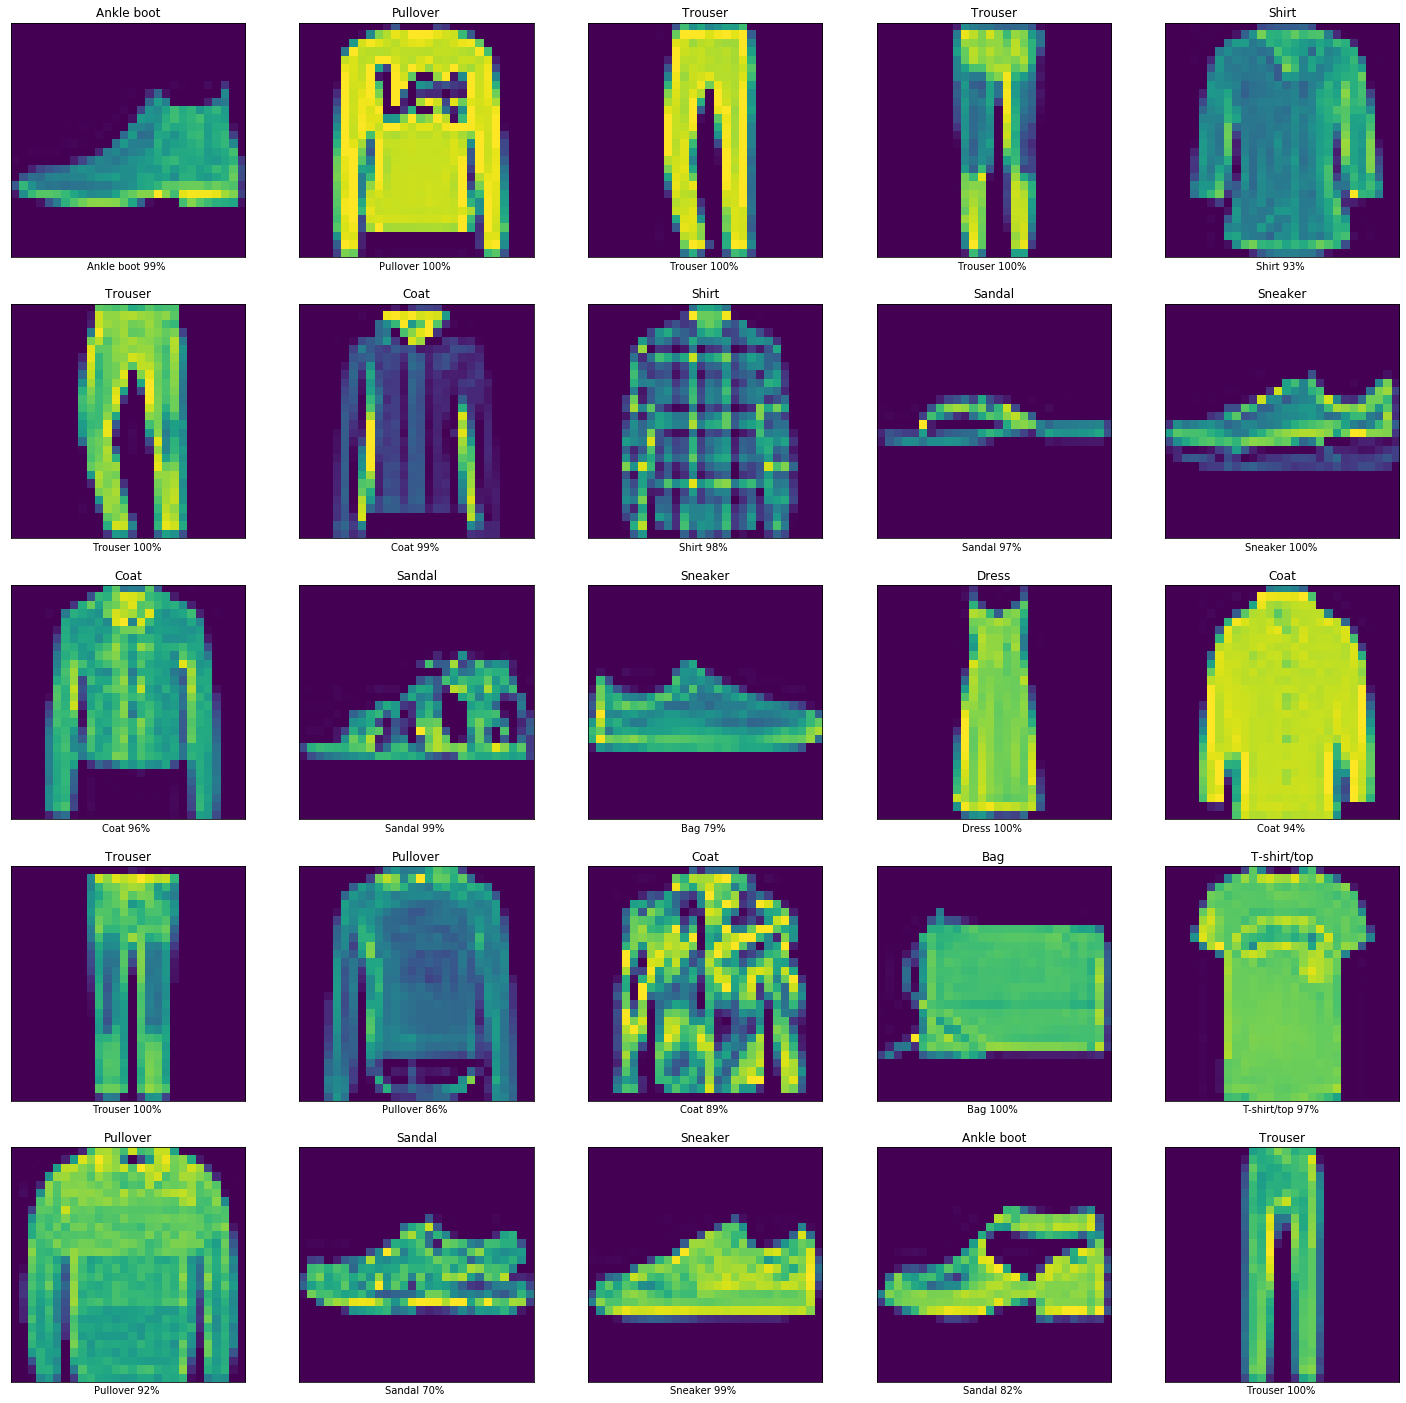

In [94]:
plt.figure(figsize=(25,25))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    plt.xlabel("{} {:2.0f}% ".format(class_label[np.argmax(predictions[i])], 100*np.max(predictions[i])))
    plt.title(class_label[test_label[i]])
plt.show()